# 标准方程法（牛顿法）
用于多元线性回归参数求解
<li> 优点：不需要迭代率，直接求出参数的全局最优
<li> 缺点：需要计算矩阵乘法，时间复杂度为O(n^3)

$$ W=(X^TX)^{-1}X^Ty $$

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn import linear_model

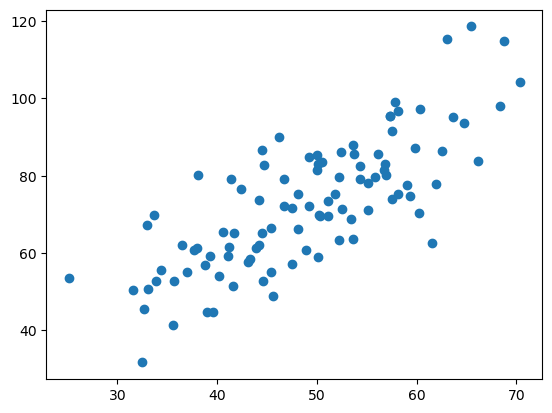

In [2]:
data=np.genfromtxt('./data.csv',delimiter=',')
x_data=data[:,0,np.newaxis]
y_data=data[:,1,np.newaxis]
plt.scatter(x_data,y_data)
plt.show()

In [3]:
# 给样本添加偏置项
X_data=np.concatenate((np.ones((100,1)),x_data),axis=1) 

In [4]:
# 标准方程法求解线性回归参数
def weights(xArr,yArr):
    xMat=np.mat(xArr)
    yMat=np.mat(yArr)
    xTx=xMat.T*xMat # 矩阵乘法
    # xTx矩阵是否可逆的判定
    if np.linalg.det(xTx)==0:
        print('This can not be inversed!')
        return
    # 矩阵可逆，进行标准方程公式计算
    Ws=xTx.I*xMat.T*yMat
    return Ws

In [5]:
ws=weights(X_data,y_data)
print(ws)

[[7.99102098]
 [1.32243102]]


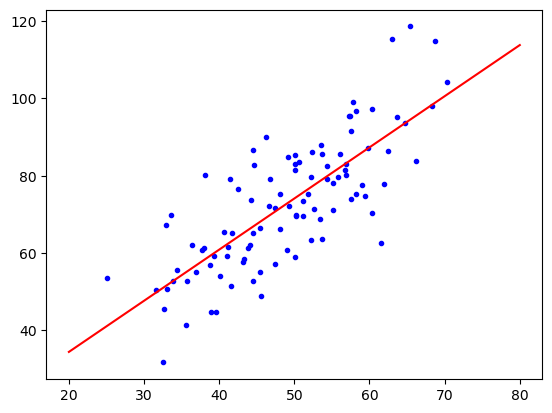

In [6]:
# 结果显示
x_test=np.array([[20],[80]])
y_test=ws[0]+ws[1,0]*x_test
plt.plot(x_data,y_data,'b.')
plt.plot(x_test,y_test,'r')
plt.show()

## 岭回归

如果特征数目大于样本数目，则$ X^TX^{-1} $会出错，因为($ X^TX $)不是满秩矩阵，所以不可逆
因此引入<u>岭回归</u>,更改算式如下：
$$W=(X^TX+\lambda I)^{-1}X^Ty$$
$\lambda$为岭系数，I为单位阵
岭回归的代价函数为最小二乘损失函数的L2正则化
岭回归现在也用于加入偏差，是一种有偏估计


选择$\lambda$值，使得：
1. 各回归系数的岭估计基本稳定
2. 残差平方和增大不太多

In [9]:
# 岭回归sklearn实现
data=np.genfromtxt('./longley.csv',delimiter=',')
print(data)

[[     nan      nan      nan      nan      nan      nan      nan      nan]
 [     nan   83.     234.289  235.6    159.     107.608 1947.      60.323]
 [     nan   88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [     nan   88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [     nan   89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [     nan   96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [     nan   98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [     nan   99.     365.385  187.     354.7    115.094 1953.      64.989]
 [     nan  100.     363.112  357.8    335.     116.219 1954.      63.761]
 [     nan  101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [     nan  104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [     nan  108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [     nan  110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [     nan  112.6    482.

In [10]:
x_data=data[1:,2:]
y_data=data[1:,1]
print(x_data)
print(y_data)

[[ 234.289  235.6    159.     107.608 1947.      60.323]
 [ 259.426  232.5    145.6    108.632 1948.      61.122]
 [ 258.054  368.2    161.6    109.773 1949.      60.171]
 [ 284.599  335.1    165.     110.929 1950.      61.187]
 [ 328.975  209.9    309.9    112.075 1951.      63.221]
 [ 346.999  193.2    359.4    113.27  1952.      63.639]
 [ 365.385  187.     354.7    115.094 1953.      64.989]
 [ 363.112  357.8    335.     116.219 1954.      63.761]
 [ 397.469  290.4    304.8    117.388 1955.      66.019]
 [ 419.18   282.2    285.7    118.734 1956.      67.857]
 [ 442.769  293.6    279.8    120.445 1957.      68.169]
 [ 444.546  468.1    263.7    121.95  1958.      66.513]
 [ 482.704  381.3    255.2    123.366 1959.      68.655]
 [ 502.601  393.1    251.4    125.368 1960.      69.564]
 [ 518.173  480.6    257.2    127.852 1961.      69.331]
 [ 554.894  400.7    282.7    130.081 1962.      70.551]]
[ 83.   88.5  88.2  89.5  96.2  98.1  99.  100.  101.2 104.6 108.4 110.8
 112.6 114.2 1

In [20]:
# 模型创建
alpha_to_test=np.linspace(0.01,1,50)
#岭回归模型，CV是交叉验证方法，alpha是待选岭回归系数
model=linear_model.RidgeCV(alphas=alpha_to_test,store_cv_values=True)
model.fit(x_data,y_data)

#岭系数（待测值中的最佳值）
print('best lambda: '+str(model.alpha_))
print(model.cv_values_.shape)#保存的交叉验证值,16行指交叉验证可以进行16次，得到16个loss值
# 50是每次交叉验证对50个待定alpha都有一个loss值

best lambda: 0.39387755102040817
(16, 50)


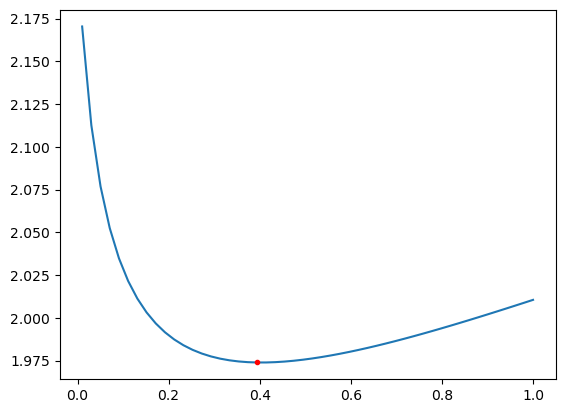

In [15]:
# 画图
# 岭系数和loss的关系
plt.plot(alpha_to_test,model.cv_values_.mean(axis=0))
# loss最低的岭系数选择
plt.plot(model.alpha_,min(model.cv_values_.mean(axis=0)),'r.')
plt.show()

## Lasso回归

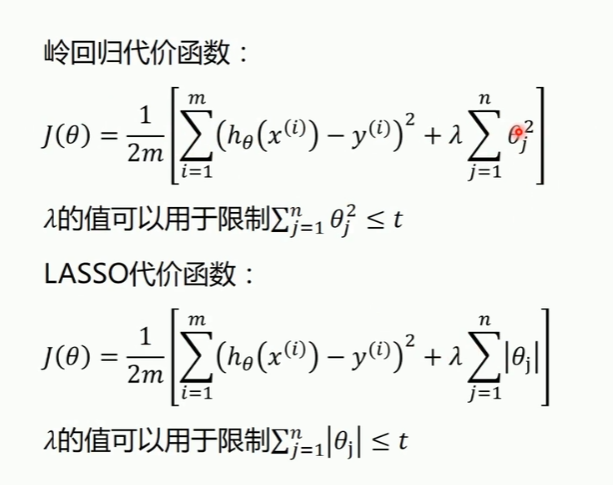

In [25]:
data=genfromtxt(r'./longley.csv',delimiter=',')
x_data=data[1:,2:]
y_data=data[1:,1]
print(x_data)
print(y_data)

[[ 234.289  235.6    159.     107.608 1947.      60.323]
 [ 259.426  232.5    145.6    108.632 1948.      61.122]
 [ 258.054  368.2    161.6    109.773 1949.      60.171]
 [ 284.599  335.1    165.     110.929 1950.      61.187]
 [ 328.975  209.9    309.9    112.075 1951.      63.221]
 [ 346.999  193.2    359.4    113.27  1952.      63.639]
 [ 365.385  187.     354.7    115.094 1953.      64.989]
 [ 363.112  357.8    335.     116.219 1954.      63.761]
 [ 397.469  290.4    304.8    117.388 1955.      66.019]
 [ 419.18   282.2    285.7    118.734 1956.      67.857]
 [ 442.769  293.6    279.8    120.445 1957.      68.169]
 [ 444.546  468.1    263.7    121.95  1958.      66.513]
 [ 482.704  381.3    255.2    123.366 1959.      68.655]
 [ 502.601  393.1    251.4    125.368 1960.      69.564]
 [ 518.173  480.6    257.2    127.852 1961.      69.331]
 [ 554.894  400.7    282.7    130.081 1962.      70.551]]
[ 83.   88.5  88.2  89.5  96.2  98.1  99.  100.  101.2 104.6 108.4 110.8
 112.6 114.2 1

In [22]:
model=linear_model.LassoCV()
# model=linear_model.ElasticNetCV() 弹性网回归，有点像岭回归和lasso结合
model.fit(x_data,y_data)

# lasso系数
print(model.alpha_)
# 求得参数
print(model.coef_)

14.134043936116361
[0.10093575 0.00586331 0.00599214 0.         0.         0.        ]


In [24]:
model.predict(x_data[-2,np.newaxis])

array([115.77558105])

总结：感觉岭回归，lasso这些方式最大的作用是处理特征之间有线性相关性的线性回归问题，针对特征数目比较多的数据